In [102]:
setwd("D:\\R\\group\\...")

In [103]:
#install.packages("fastDummies", repos = "http://cran.us.r-project.org")

Warning message:
"package 'fastDummies' is in use and will not be installed"

In [1]:
library("fastDummies")
library("caret")
library(class)

Warning message:
"package 'fastDummies' was built under R version 3.5.3"Loading required package: lattice
Loading required package: ggplot2
Warning message:
"package 'ggplot2' was built under R version 3.5.3"

In [105]:
train <- read.csv("D:\\R\\group\\Data-final.csv")
train$PetID <- NULL
train$RescuerID <- NULL
train$Description <- NULL
train$Name <- NULL
train$Breed1 <- NULL
train$Breed2 <- NULL
train$State <- NULL
train <- dummy_cols(train, select_columns = c("MaturitySize","Color1", "Color2","Color3","FurLength",'Vaccinated','Dewormed','Sterilized','Health'), remove_first_dummy = FALSE)
train$Color1 <- NULL
train$Color2 <- NULL
train$Color3 <- NULL
train$MaturitySize <- NULL
train$FurLength <- NULL
train$Vaccinated <- NULL
train$Dewormed <- NULL
train$Sterilized <- NULL
train$Health <- NULL

train$Dog.Friendly <- NULL
train$Easy.To.Groom <- NULL
train$Easy.To.Train <- NULL
train$Exercise.Needs <- NULL
train$Friendly.Toward.Strangers <- NULL
train$General.Health <- NULL
train$Incredibly.Kid.Friendly.Dogs <- NULL
train$Intelligence <- NULL
train$Potential.For.Playfulness <- NULL
train$Tendency.To.Bark.Or.Howl <- NULL
train$life_span <- NULL
train$PC1 <- NULL
train$PC2 <- NULL
train$PC3 <- NULL
train$PC4 <- NULL
train$PC5 <- NULL

train$Crime.Index.Ration.per.100.000..2017 <- NULL
train$living.space.per.capita.sq.ft. <- NULL
train$Median.income.by.State <- NULL

train$adoptionspeed0.1 <- NULL
train$most.popular <- NULL

In [106]:
#fix(train)

In [107]:
#train[8]

In [108]:
dim(train)

[1] 14990    50

In [109]:
# to scale data
fun <- function(x){ 
  a <- mean(x) 
  b <- sd(x) 
  (x - a)/(b) 
}

train[,1:7] <- apply(train[,1:7], 2, fun)
train[,9:50] <- apply(train[,9:50], 2, fun)

In [110]:
#
set.seed(12345)
inTrain <- createDataPartition(train$AdoptionSpeed, p=0.7, list=FALSE)
#
dftrain <- data.frame(train[inTrain,])
dfvalidation <- data.frame(train[-inTrain,])

# 
train_input <- as.matrix(dftrain[,-8])
train_output <- as.vector(dftrain[,8])
validate_input <- as.matrix(dfvalidation[,-8])

In [111]:
kmax <- 20
AC1 <- rep(0,kmax)
AC2 <- rep(0,kmax)
#
for (i in 1:kmax){
  print(i)
  prediction <- knn(train_input, train_input,train_output, k=i)
  prediction2 <- knn(train_input, validate_input,train_output, k=i)
  # The confusion matrix for training data is:
  CM1 <- table(prediction, dftrain$AdoptionSpeed)
  # The training error rate is:
  AC1[i] <- (CM1[1,1]+CM1[2,2]+CM1[3,3]+CM1[4,4]+CM1[5,5])/sum(CM1)
  print(CM1)
  # The confusion matrix for validation data is: 
  CM2 <- table(prediction2, dfvalidation$AdoptionSpeed)
  # The validation error rate is:
  AC2[i] <- (CM2[1,1]+CM2[2,2]+CM2[3,3]+CM2[4,4]+CM2[5,5])/sum(CM2)
  print(CM2)
}

[1] 1
          
prediction    0    1    2    3    4
         0  296    0    0    0    0
         1    0 2148    6    1    1
         2    0    7 2814    3    0
         3    0    3    1 2277    0
         4    0    1    0    0 2936
           
prediction2   0   1   2   3   4
          0   9  49  46  33  40
          1  30 229 269 175 220
          2  31 270 347 266 313
          3  22 162 255 266 233
          4  22 221 298 237 453
[1] 2
          
prediction    0    1    2    3    4
         0  164   35   26   20   30
         1   36 1381  330  227  251
         2   39  305 1860  312  338
         3   28  212  293 1435  325
         4   29  226  312  287 1993
           
prediction2   0   1   2   3   4
          0   7  42  37  28  34
          1  24 237 287 178 240
          2  37 274 348 289 304
          3  21 166 246 236 259
          4  25 212 297 246 422
[1] 3
          
prediction    0    1    2    3    4
         0   99   45   33   25   34
         1   52 1190  354  240  252
 

[1] 0.9978083 0.6511340 0.5938632 0.5590814 0.5263007 0.5054317 0.4926625
 [8] 0.4797027 0.4716028 0.4623594 0.4514961 0.4534972 0.4474938 0.4438727
[15] 0.4363446 0.4310082 0.4252906 0.4234801 0.4189060 0.4142367

[1] 0.2900356 0.2780249 0.2858096 0.2924822 0.3027135 0.3031584 0.3071619
 [8] 0.3140569 0.3187278 0.3189502 0.3180605 0.3216192 0.3242883 0.3218416
[15] 0.3269573 0.3191726 0.3180605 0.3198399 0.3227313 0.3222865

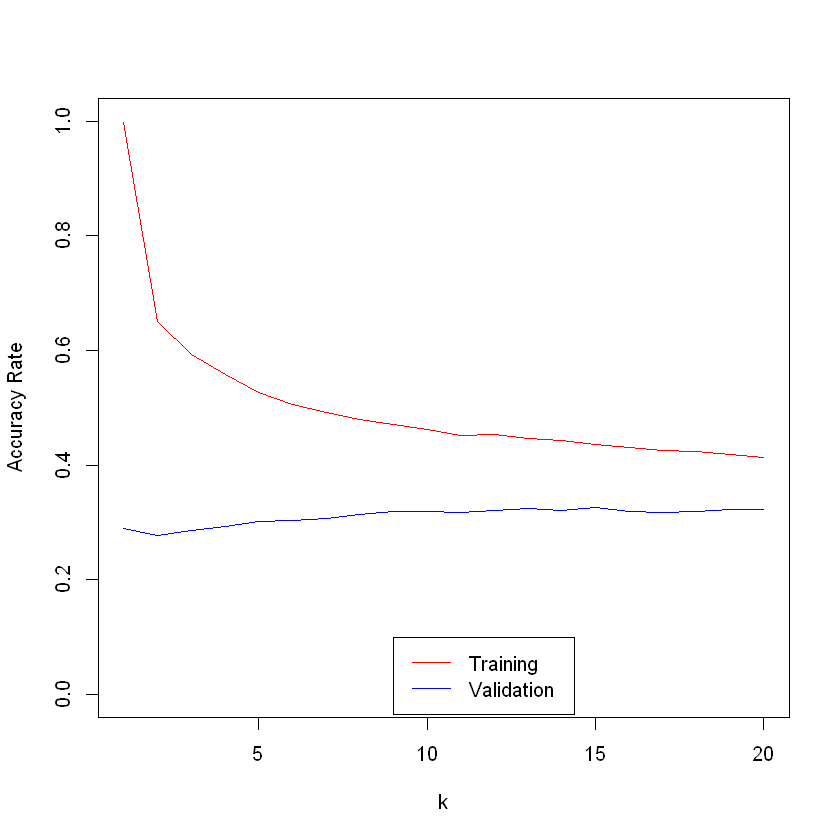

In [112]:
plot(c(1,kmax),c(0,1),type="n", xlab="k",ylab="Accuracy Rate")
lines(AC1,col="red")
lines(AC2,col="blue")
legend(9, 0.1, c("Training","Validation"),lty=c(1,1), col=c("red","blue"))

AC1
AC2

# STEP 2 DV(0,1)

In [113]:
#no dummy, no PCA
train <- read.csv("D:\\R\\group\\Data-final.csv")
train$PetID <- NULL
train$RescuerID <- NULL
train$Description <- NULL
train$Name <- NULL
train$Breed1 <- NULL
train$Breed2 <- NULL
train$State <- NULL
train <- dummy_cols(train, select_columns = c("MaturitySize","Color1", "Color2","Color3","FurLength",'Vaccinated','Dewormed','Sterilized','Health'), remove_first_dummy = FALSE)
train$Color1 <- NULL
train$Color2 <- NULL
train$Color3 <- NULL
train$MaturitySize <- NULL
train$FurLength <- NULL
train$Vaccinated <- NULL
train$Dewormed <- NULL
train$Sterilized <- NULL
train$Health <- NULL

train$Dog.Friendly <- NULL
train$Easy.To.Groom <- NULL
train$Easy.To.Train <- NULL
train$Exercise.Needs <- NULL
train$Friendly.Toward.Strangers <- NULL
train$General.Health <- NULL
train$Incredibly.Kid.Friendly.Dogs <- NULL
train$Intelligence <- NULL
train$Potential.For.Playfulness <- NULL
train$Tendency.To.Bark.Or.Howl <- NULL
train$life_span <- NULL
train$PC1 <- NULL
train$PC2 <- NULL
train$PC3 <- NULL
train$PC4 <- NULL
train$PC5 <- NULL

train$Crime.Index.Ration.per.100.000..2017 <- NULL
train$living.space.per.capita.sq.ft. <- NULL
train$Median.income.by.State <- NULL

train$adoptionspeed <- NULL
train$most.popular <- NULL

In [114]:
#train[10]

In [115]:
dim(train)

[1] 14990    51

In [116]:
# to scale data
fun <- function(x){ 
  a <- mean(x) 
  b <- sd(x) 
  (x - a)/(b) 
}

train[,1:9] <- apply(train[,1:9], 2, fun)
train[,11:51] <- apply(train[,11:51], 2, fun)

In [117]:
#
set.seed(12345)
inTrain <- createDataPartition(train$adoptionspeed0.1, p=0.7, list=FALSE)
#
dftrain <- data.frame(train[inTrain,])
dfvalidation <- data.frame(train[-inTrain,])

# 
train_input <- as.matrix(dftrain[,-10])
train_output <- as.vector(dftrain[,10])
validate_input <- as.matrix(dfvalidation[,-10])

In [118]:
kmax <- 20
AC1 <- rep(0,kmax)
AC2 <- rep(0,kmax)
#
for (i in 1:kmax){
  print(i)
  prediction <- knn(train_input, train_input,train_output, k=i)
  prediction2 <- knn(train_input, validate_input,train_output, k=i)
  # The confusion matrix for training data is:
  CM1 <- table(prediction, dftrain$adoptionspeed0.1)
  print(CM1)
  # The training error rate is:
  AC1[i] <- (CM1[1,1]+CM1[2,2])/sum(CM1)
  # The confusion matrix for validation data is: 
  CM2 <- table(prediction2, dfvalidation$adoptionspeed0.1)
  print(CM2)
  # The validation error rate is:
  AC2[i] <- (CM2[1,1]+CM2[2,2])/sum(CM2)
}

[1] 1
          
prediction    0    1
         0 8017    0
         1    0 2476
           
prediction2    0    1
          0 3110  472
          1  363  552
[1] 2
          
prediction    0    1
         0 7573  583
         1  444 1893
           
prediction2    0    1
          0 3045  501
          1  428  523
[1] 3
          
prediction    0    1
         0 7764  674
         1  253 1802
           
prediction2    0    1
          0 3219  543
          1  254  481
[1] 4
          
prediction    0    1
         0 7671  902
         1  346 1574
           
prediction2    0    1
          0 3210  542
          1  263  482
[1] 5
          
prediction    0    1
         0 7815  971
         1  202 1505
           
prediction2    0    1
          0 3303  584
          1  170  440
[1] 6
          
prediction    0    1
         0 7767 1087
         1  250 1389
           
prediction2    0    1
          0 3312  600
          1  161  424
[1] 7
          
prediction    0    1
         0 785

[1] 1.0000000 0.9021252 0.9116554 0.8810636 0.8882112 0.8725817 0.8712475
 [8] 0.8617173 0.8598113 0.8546650 0.8500905 0.8443724 0.8400839 0.8392262
[15] 0.8357000 0.8321738 0.8292195 0.8276947 0.8250262 0.8235014

[1] 0.8143207 0.7934178 0.8227707 0.8209918 0.8323327 0.8307761 0.8309984
 [8] 0.8265510 0.8312208 0.8245497 0.8269958 0.8229931 0.8203247 0.8194352
[15] 0.8176562 0.8187681 0.8185457 0.8185457 0.8167667 0.8167667

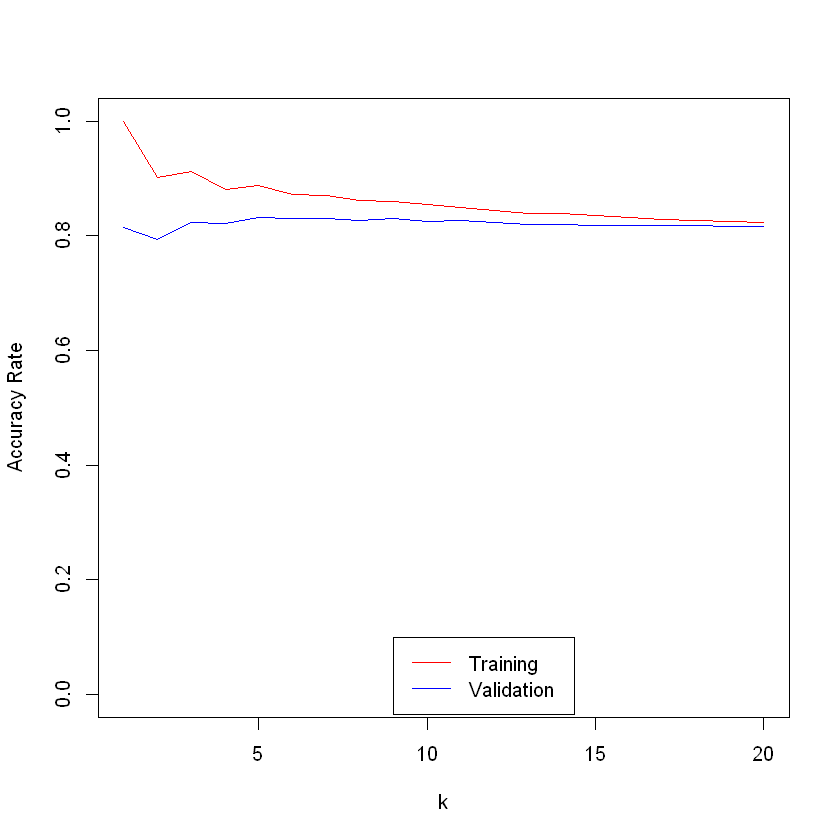

In [119]:
plot(c(1,kmax),c(0,1),type="n", xlab="k",ylab="Accuracy Rate")
lines(AC1,col="red")
lines(AC2,col="blue")
legend(9, 0.1, c("Training","Validation"),lty=c(1,1), col=c("red","blue"))

AC1
AC2

# STEP 3 +state

In [120]:
#no dummy, no PCA
train <- read.csv("D:\\R\\group\\Data-final.csv")
train$PetID <- NULL
train$RescuerID <- NULL
train$Description <- NULL
train$Name <- NULL
train$Breed1 <- NULL
train$Breed2 <- NULL
train$State <- NULL
train <- dummy_cols(train, select_columns = c("MaturitySize","Color1", "Color2","Color3","FurLength",'Vaccinated','Dewormed','Sterilized','Health'), remove_first_dummy = FALSE)
train$Color1 <- NULL
train$Color2 <- NULL
train$Color3 <- NULL
train$MaturitySize <- NULL
train$FurLength <- NULL
train$Vaccinated <- NULL
train$Dewormed <- NULL
train$Sterilized <- NULL
train$Health <- NULL

train$Dog.Friendly <- NULL
train$Easy.To.Groom <- NULL
train$Easy.To.Train <- NULL
train$Exercise.Needs <- NULL
train$Friendly.Toward.Strangers <- NULL
train$General.Health <- NULL
train$Incredibly.Kid.Friendly.Dogs <- NULL
train$Intelligence <- NULL
train$Potential.For.Playfulness <- NULL
train$Tendency.To.Bark.Or.Howl <- NULL
train$life_span <- NULL
train$PC1 <- NULL
train$PC2 <- NULL
train$PC3 <- NULL
train$PC4 <- NULL
train$PC5 <- NULL

train$adoptionspeed <- NULL
train$most.popular <- NULL

In [121]:
#train[13]

In [122]:
dim(train)

[1] 14990    54

In [123]:
# to scale data
fun <- function(x){ 
  a <- mean(x) 
  b <- sd(x) 
  (x - a)/(b) 
}

train[,1:12] <- apply(train[,1:12], 2, fun)
train[,14:54] <- apply(train[,14:54], 2, fun)

In [124]:
#
set.seed(12345)
inTrain <- createDataPartition(train$adoptionspeed0.1, p=0.7, list=FALSE)
#
dftrain <- data.frame(train[inTrain,])
dfvalidation <- data.frame(train[-inTrain,])

# 
train_input <- as.matrix(dftrain[,-13])
train_output <- as.vector(dftrain[,13])
validate_input <- as.matrix(dfvalidation[,-13])

In [125]:
kmax <- 20
AC1 <- rep(0,kmax)
AC2 <- rep(0,kmax)
#
for (i in 1:kmax){
  print(i)
  prediction <- knn(train_input, train_input,train_output, k=i)
  prediction2 <- knn(train_input, validate_input,train_output, k=i)
  # The confusion matrix for training data is:
  CM1 <- table(prediction, dftrain$adoptionspeed0.1)
  print(CM1)
  # The training error rate is:
  AC1[i] <- (CM1[1,1]+CM1[2,2])/sum(CM1)
  # The confusion matrix for validation data is: 
  CM2 <- table(prediction2, dfvalidation$adoptionspeed0.1)
  print(CM2)
  # The validation error rate is:
  AC2[i] <- (CM2[1,1]+CM2[2,2])/sum(CM2)
}

[1] 1
          
prediction    0    1
         0 8017    0
         1    0 2476
           
prediction2    0    1
          0 3061  497
          1  412  527
[1] 2
          
prediction    0    1
         0 7520  610
         1  497 1866
           
prediction2    0    1
          0 2996  545
          1  477  479
[1] 3
          
prediction    0    1
         0 7765  728
         1  252 1748
           
prediction2    0    1
          0 3199  568
          1  274  456
[1] 4
          
prediction    0    1
         0 7658  932
         1  359 1544
           
prediction2    0    1
          0 3196  573
          1  277  451
[1] 5
          
prediction    0    1
         0 7787 1048
         1  230 1428
           
prediction2    0    1
          0 3278  621
          1  195  403
[1] 6
          
prediction    0    1
         0 7747 1139
         1  270 1337
           
prediction2    0    1
          0 3290  637
          1  183  387
[1] 7
          
prediction    0    1
         0 783

[1] 1.0000000 0.8945011 0.9066044 0.8769656 0.8782045 0.8657200 0.8644811
 [8] 0.8515201 0.8516154 0.8471362 0.8435147 0.8393215 0.8347470 0.8305537
[15] 0.8292195 0.8269322 0.8245497 0.8231202 0.8195940 0.8190222

[1] 0.7978652 0.7727374 0.8127641 0.8109851 0.8185457 0.8176562 0.8207694
 [8] 0.8183233 0.8225484 0.8181010 0.8169891 0.8167667 0.8154325 0.8158773
[15] 0.8167667 0.8172115 0.8160996 0.8143207 0.8154325 0.8109851

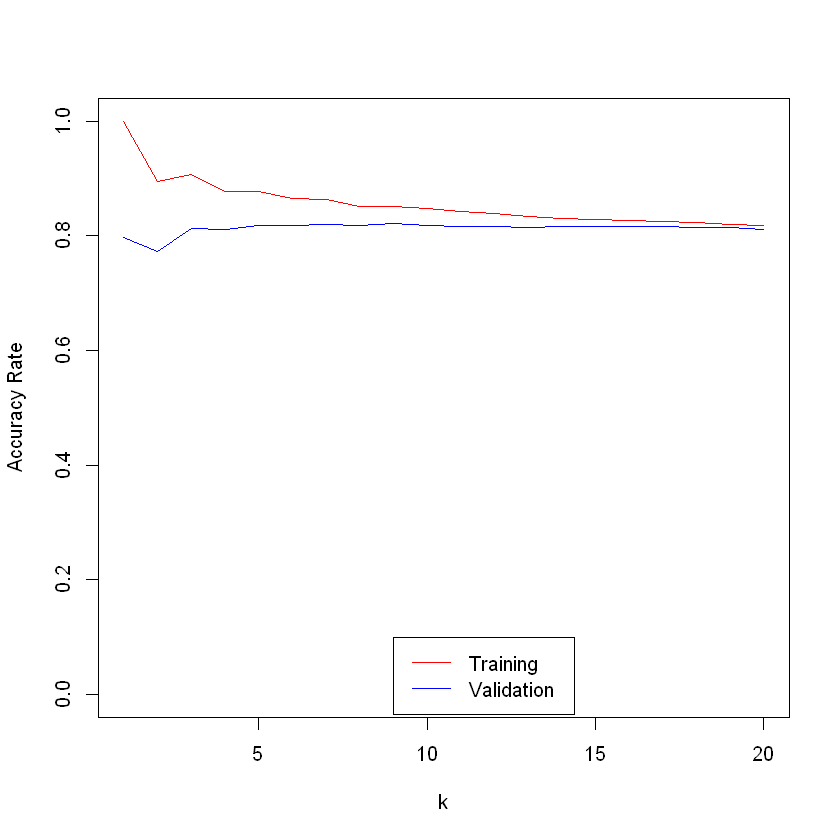

In [126]:
plot(c(1,kmax),c(0,1),type="n", xlab="k",ylab="Accuracy Rate")
lines(AC1,col="red")
lines(AC2,col="blue")
legend(9, 0.1, c("Training","Validation"),lty=c(1,1), col=c("red","blue"))

AC1
AC2

# STEP 4 +most popular

In [127]:
#no dummy, no PCA
train <- read.csv("D:\\R\\group\\Data-final.csv")
train$PetID <- NULL
train$RescuerID <- NULL
train$Description <- NULL
train$Name <- NULL
train$Breed1 <- NULL
train$Breed2 <- NULL
train$State <- NULL
train <- dummy_cols(train, select_columns = c("MaturitySize","Color1", "Color2","Color3","FurLength",'Vaccinated','Dewormed','Sterilized','Health'), remove_first_dummy = FALSE)
train$Color1 <- NULL
train$Color2 <- NULL
train$Color3 <- NULL
train$MaturitySize <- NULL
train$FurLength <- NULL
train$Vaccinated <- NULL
train$Dewormed <- NULL
train$Sterilized <- NULL
train$Health <- NULL

train$Dog.Friendly <- NULL
train$Easy.To.Groom <- NULL
train$Easy.To.Train <- NULL
train$Exercise.Needs <- NULL
train$Friendly.Toward.Strangers <- NULL
train$General.Health <- NULL
train$Incredibly.Kid.Friendly.Dogs <- NULL
train$Intelligence <- NULL
train$Potential.For.Playfulness <- NULL
train$Tendency.To.Bark.Or.Howl <- NULL
train$life_span <- NULL
train$PC1 <- NULL
train$PC2 <- NULL
train$PC3 <- NULL
train$PC4 <- NULL
train$PC5 <- NULL

train$adoptionspeed <- NULL

In [128]:
#train[13]

In [129]:
dim(train)

[1] 14990    55

In [130]:
# to scale data
fun <- function(x){ 
  a <- mean(x) 
  b <- sd(x) 
  (x - a)/(b) 
}

train[,1:12] <- apply(train[,1:12], 2, fun)
train[,14:55] <- apply(train[,14:55], 2, fun)

In [131]:
#
set.seed(12345)
inTrain <- createDataPartition(train$adoptionspeed0.1, p=0.7, list=FALSE)
#
dftrain <- data.frame(train[inTrain,])
dfvalidation <- data.frame(train[-inTrain,])

# 
train_input <- as.matrix(dftrain[,-13])
train_output <- as.vector(dftrain[,13])
validate_input <- as.matrix(dfvalidation[,-13])

In [132]:
kmax <- 20
AC1 <- rep(0,kmax)
AC2 <- rep(0,kmax)
#
for (i in 1:kmax){
  print(i)
  prediction <- knn(train_input, train_input,train_output, k=i)
  prediction2 <- knn(train_input, validate_input,train_output, k=i)
  # The confusion matrix for training data is:
  CM1 <- table(prediction, dftrain$adoptionspeed0.1)
  print(CM1)
  # The training error rate is:
  AC1[i] <- (CM1[1,1]+CM1[2,2])/sum(CM1)
  # The confusion matrix for validation data is: 
  CM2 <- table(prediction2, dfvalidation$adoptionspeed0.1)
  print(CM2)
  # The validation error rate is:
  AC2[i] <- (CM2[1,1]+CM2[2,2])/sum(CM2)
}

[1] 1
          
prediction    0    1
         0 8017    0
         1    0 2476
           
prediction2    0    1
          0 3064  514
          1  409  510
[1] 2
          
prediction    0    1
         0 7522  617
         1  495 1859
           
prediction2    0    1
          0 3014  541
          1  459  483
[1] 3
          
prediction    0    1
         0 7756  728
         1  261 1748
           
prediction2    0    1
          0 3180  575
          1  293  449
[1] 4
          
prediction    0    1
         0 7676  924
         1  341 1552
           
prediction2    0    1
          0 3183  591
          1  290  433
[1] 5
          
prediction    0    1
         0 7794 1042
         1  223 1434
           
prediction2    0    1
          0 3286  645
          1  187  379
[1] 6
          
prediction    0    1
         0 7767 1128
         1  250 1348
           
prediction2    0    1
          0 3287  650
          1  186  374
[1] 7
          
prediction    0    1
         0 784

[1] 1.0000000 0.8940246 0.9057467 0.8794434 0.8794434 0.8686744 0.8643858
 [8] 0.8559992 0.8519966 0.8490422 0.8437053 0.8375107 0.8339846 0.8315067
[15] 0.8288383 0.8258839 0.8237873 0.8231202 0.8211188 0.8175927

[1] 0.7947521 0.7776295 0.8069824 0.8040916 0.8149878 0.8140983 0.8178786
 [8] 0.8132088 0.8185457 0.8152101 0.8116522 0.8109851 0.8156549 0.8145430
[15] 0.8160996 0.8165444 0.8165444 0.8152101 0.8143207 0.8136535

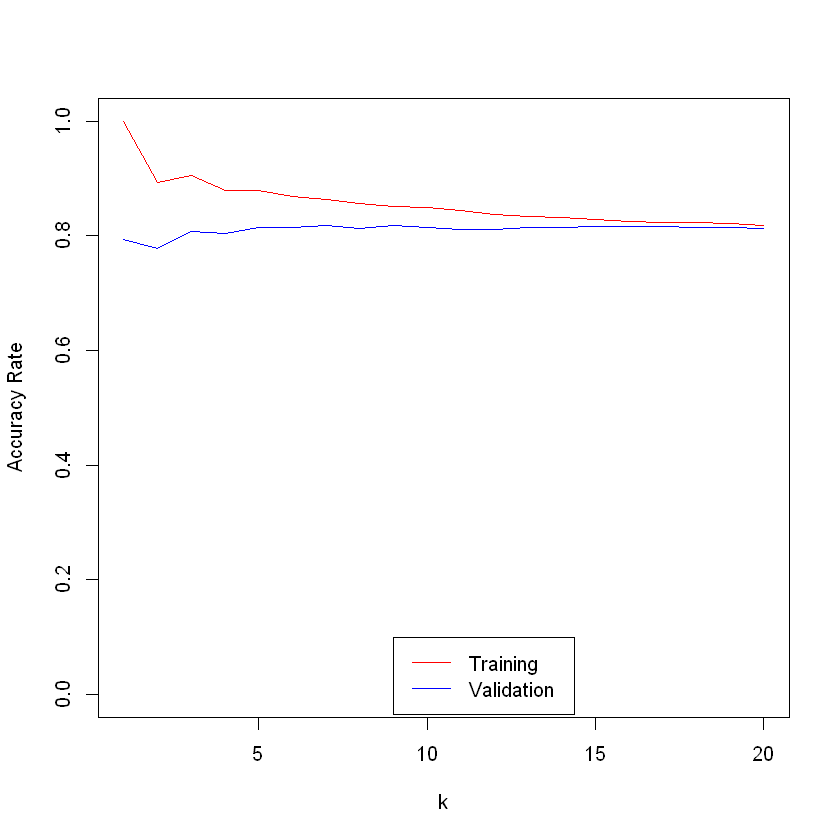

In [133]:
plot(c(1,kmax),c(0,1),type="n", xlab="k",ylab="Accuracy Rate")
lines(AC1,col="red")
lines(AC2,col="blue")
legend(9, 0.1, c("Training","Validation"),lty=c(1,1), col=c("red","blue"))

AC1
AC2

# STEP 5 +sentiment analysis

In [134]:
#no dummy, no PCA
train <- read.csv("D:\\R\\group\\Data-final.csv")
train$PetID <- NULL
train$RescuerID <- NULL
train$Description <- NULL
train$Name <- NULL
train$Breed1 <- NULL
train$Breed2 <- NULL
train$State <- NULL
train <- dummy_cols(train, select_columns = c("MaturitySize","Color1", "Color2","Color3","FurLength",'Vaccinated','Dewormed','Sterilized','Health'), remove_first_dummy = FALSE)
train$Color1 <- NULL
train$Color2 <- NULL
train$Color3 <- NULL
train$MaturitySize <- NULL
train$FurLength <- NULL
train$Vaccinated <- NULL
train$Dewormed <- NULL
train$Sterilized <- NULL
train$Health <- NULL

train$Dog.Friendly <- NULL
train$Easy.To.Groom <- NULL
train$Easy.To.Train <- NULL
train$Exercise.Needs <- NULL
train$Friendly.Toward.Strangers <- NULL
train$General.Health <- NULL
train$Incredibly.Kid.Friendly.Dogs <- NULL
train$Intelligence <- NULL
train$Potential.For.Playfulness <- NULL
train$Tendency.To.Bark.Or.Howl <- NULL
train$life_span <- NULL
train$PC1 <- NULL
train$PC2 <- NULL
train$PC3 <- NULL
train$PC4 <- NULL
train$PC5 <- NULL

train$adoptionspeed <- NULL

In [135]:
#train[13]

In [136]:
dim(train)

[1] 14990    55

In [137]:
# to scale data
fun <- function(x){ 
  a <- mean(x) 
  b <- sd(x) 
  (x - a)/(b) 
}

train[,1:12] <- apply(train[,1:12], 2, fun)
train[,14:55] <- apply(train[,14:55], 2, fun)

In [138]:
#
set.seed(12345)
inTrain <- createDataPartition(train$adoptionspeed0.1, p=0.7, list=FALSE)
#
dftrain <- data.frame(train[inTrain,])
dfvalidation <- data.frame(train[-inTrain,])

# 
train_input <- as.matrix(dftrain[,-13])
train_output <- as.vector(dftrain[,13])
validate_input <- as.matrix(dfvalidation[,-13])

In [139]:
kmax <- 20
AC1 <- rep(0,kmax)
AC2 <- rep(0,kmax)
#
for (i in 1:kmax){
  print(i)
  prediction <- knn(train_input, train_input,train_output, k=i)
  prediction2 <- knn(train_input, validate_input,train_output, k=i)
  # The confusion matrix for training data is:
  CM1 <- table(prediction, dftrain$adoptionspeed0.1)
  print(CM1)
  # The training error rate is:
  AC1[i] <- (CM1[1,1]+CM1[2,2])/sum(CM1)
  # The confusion matrix for validation data is: 
  CM2 <- table(prediction2, dfvalidation$adoptionspeed0.1)
  print(CM2)
  # The validation error rate is:
  AC2[i] <- (CM2[1,1]+CM2[2,2])/sum(CM2)
}

[1] 1
          
prediction    0    1
         0 8017    0
         1    0 2476
           
prediction2    0    1
          0 3064  514
          1  409  510
[1] 2
          
prediction    0    1
         0 7522  617
         1  495 1859
           
prediction2    0    1
          0 3014  541
          1  459  483
[1] 3
          
prediction    0    1
         0 7756  728
         1  261 1748
           
prediction2    0    1
          0 3180  575
          1  293  449
[1] 4
          
prediction    0    1
         0 7676  924
         1  341 1552
           
prediction2    0    1
          0 3183  591
          1  290  433
[1] 5
          
prediction    0    1
         0 7794 1042
         1  223 1434
           
prediction2    0    1
          0 3286  645
          1  187  379
[1] 6
          
prediction    0    1
         0 7767 1128
         1  250 1348
           
prediction2    0    1
          0 3287  650
          1  186  374
[1] 7
          
prediction    0    1
         0 784

[1] 1.0000000 0.8940246 0.9057467 0.8794434 0.8794434 0.8686744 0.8643858
 [8] 0.8559992 0.8519966 0.8490422 0.8437053 0.8375107 0.8339846 0.8315067
[15] 0.8288383 0.8258839 0.8237873 0.8231202 0.8211188 0.8175927

[1] 0.7947521 0.7776295 0.8069824 0.8040916 0.8149878 0.8140983 0.8178786
 [8] 0.8132088 0.8185457 0.8152101 0.8116522 0.8109851 0.8156549 0.8145430
[15] 0.8160996 0.8165444 0.8165444 0.8152101 0.8143207 0.8136535

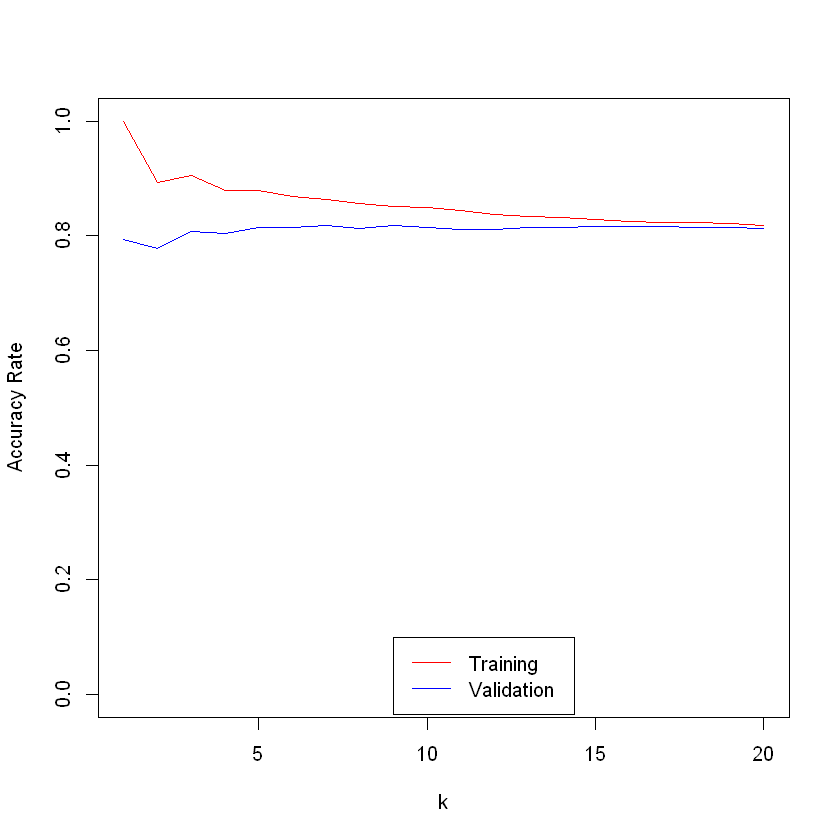

In [140]:
plot(c(1,kmax),c(0,1),type="n", xlab="k",ylab="Accuracy Rate")
lines(AC1,col="red")
lines(AC2,col="blue")
legend(9, 0.1, c("Training","Validation"),lty=c(1,1), col=c("red","blue"))

AC1
AC2

# STEP 6 + pet features

In [2]:
#no dummy, no PCA
train <- read.csv("D:\\R\\group\\Data-final.csv")
train$PetID <- NULL
train$RescuerID <- NULL
train$Description <- NULL
train$Name <- NULL
train$Breed1 <- NULL
train$Breed2 <- NULL
train$State <- NULL
train <- dummy_cols(train, select_columns = c("MaturitySize","Color1", "Color2","Color3","FurLength",'Vaccinated','Dewormed','Sterilized','Health'), remove_first_dummy = FALSE)
train$Color1 <- NULL
train$Color2 <- NULL
train$Color3 <- NULL
train$MaturitySize <- NULL
train$FurLength <- NULL
train$Vaccinated <- NULL
train$Dewormed <- NULL
train$Sterilized <- NULL
train$Health <- NULL

train$PC1 <- NULL
train$PC2 <- NULL
train$PC3 <- NULL
train$PC4 <- NULL
train$PC5 <- NULL

train$adoptionspeed <- NULL

In [6]:
#train[24]

In [3]:
dim(train)

[1] 14990    66

In [7]:
# to scale data
fun <- function(x){ 
  a <- mean(x) 
  b <- sd(x) 
  (x - a)/(b) 
}

train[,1:23] <- apply(train[,1:23], 2, fun)
train[,25:66] <- apply(train[,25:66], 2, fun)

In [8]:
#
set.seed(12345)
inTrain <- createDataPartition(train$adoptionspeed0.1, p=0.7, list=FALSE)
#
dftrain <- data.frame(train[inTrain,])
dfvalidation <- data.frame(train[-inTrain,])

# 
train_input <- as.matrix(dftrain[,-24])
train_output <- as.vector(dftrain[,24])
validate_input <- as.matrix(dfvalidation[,-24])

In [9]:
kmax <- 20
AC1 <- rep(0,kmax)
AC2 <- rep(0,kmax)
#
for (i in 1:kmax){
  print(i)
  prediction <- knn(train_input, train_input,train_output, k=i)
  prediction2 <- knn(train_input, validate_input,train_output, k=i)
  # The confusion matrix for training data is:
  CM1 <- table(prediction, dftrain$adoptionspeed0.1)
  print(CM1)
  # The training error rate is:
  AC1[i] <- (CM1[1,1]+CM1[2,2])/sum(CM1)
  # The confusion matrix for validation data is: 
  CM2 <- table(prediction2, dfvalidation$adoptionspeed0.1)
  print(CM2)
  # The validation error rate is:
  AC2[i] <- (CM2[1,1]+CM2[2,2])/sum(CM2)
}

[1] 1
          
prediction    0    1
         0 8017    0
         1    0 2476
           
prediction2    0    1
          0 3047  541
          1  426  483
[1] 2
          
prediction    0    1
         0 7505  601
         1  512 1875
           
prediction2    0    1
          0 3002  558
          1  471  466
[1] 3
          
prediction    0    1
         0 7730  768
         1  287 1708
           
prediction2    0    1
          0 3173  603
          1  300  421
[1] 4
          
prediction    0    1
         0 7633  965
         1  384 1511
           
prediction2    0    1
          0 3168  613
          1  305  411
[1] 5
          
prediction    0    1
         0 7752 1079
         1  265 1397
           
prediction2    0    1
          0 3263  651
          1  210  373
[1] 6
          
prediction    0    1
         0 7735 1132
         1  282 1344
           
prediction2    0    1
          0 3270  660
          1  203  364
[1] 7
          
prediction    0    1
         0 781

[1] 1.0000000 0.8939293 0.8994568 0.8714381 0.8719146 0.8652435 0.8602878
 [8] 0.8484704 0.8485657 0.8419899 0.8386543 0.8324597 0.8291242 0.8265510
[15] 0.8247403 0.8209282 0.8209282 0.8183551 0.8159726 0.8137806

[1] 0.7849678 0.7711808 0.7991995 0.7958639 0.8085390 0.8080943 0.8136535
 [8] 0.8125417 0.8129864 0.8098732 0.8096509 0.8069824 0.8067601 0.8080943
[15] 0.8096509 0.8100956 0.8118746 0.8114298 0.8085390 0.8063153

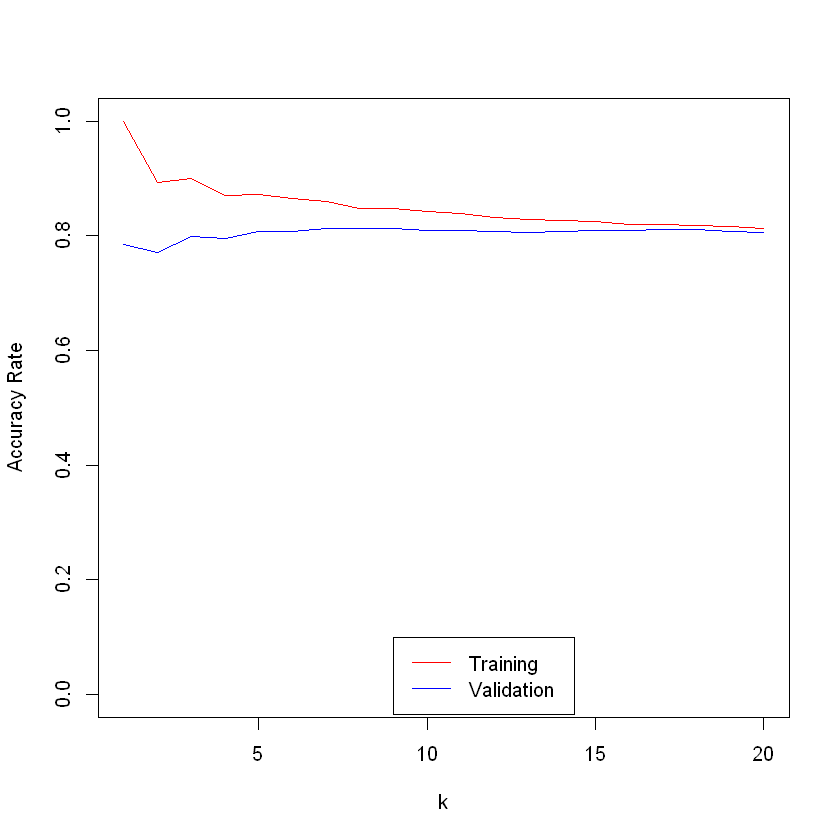

In [10]:
plot(c(1,kmax),c(0,1),type="n", xlab="k",ylab="Accuracy Rate")
lines(AC1,col="red")
lines(AC2,col="blue")
legend(9, 0.1, c("Training","Validation"),lty=c(1,1), col=c("red","blue"))

AC1
AC2

# STEP 7 +PCA

In [148]:
#no dummy, no PCA
train <- read.csv("D:\\R\\group\\Data-final.csv")
train$PetID <- NULL
train$RescuerID <- NULL
train$Description <- NULL
train$Name <- NULL
train$Breed1 <- NULL
train$Breed2 <- NULL
train$State <- NULL
train <- dummy_cols(train, select_columns = c("MaturitySize","Color1", "Color2","Color3","FurLength",'Vaccinated','Dewormed','Sterilized','Health'), remove_first_dummy = FALSE)
train$Color1 <- NULL
train$Color2 <- NULL
train$Color3 <- NULL
train$MaturitySize <- NULL
train$FurLength <- NULL
train$Vaccinated <- NULL
train$Dewormed <- NULL
train$Sterilized <- NULL
train$Health <- NULL

train$Dog.Friendly <- NULL
train$Easy.To.Groom <- NULL
train$Easy.To.Train <- NULL
train$Exercise.Needs <- NULL
train$Friendly.Toward.Strangers <- NULL
train$General.Health <- NULL
train$Incredibly.Kid.Friendly.Dogs <- NULL
train$Intelligence <- NULL
train$Potential.For.Playfulness <- NULL
train$Tendency.To.Bark.Or.Howl <- NULL

train$adoptionspeed <- NULL

In [149]:
#train[14]

In [150]:
dim(train)

[1] 14990    61

In [151]:
# to scale data
fun <- function(x){ 
  a <- mean(x) 
  b <- sd(x) 
  (x - a)/(b) 
}

train[,1:13] <- apply(train[,1:13], 2, fun)
train[,15:61] <- apply(train[,15:61], 2, fun)

In [152]:
#
set.seed(12345)
inTrain <- createDataPartition(train$adoptionspeed0.1, p=0.7, list=FALSE)
#
dftrain <- data.frame(train[inTrain,])
dfvalidation <- data.frame(train[-inTrain,])

# 
train_input <- as.matrix(dftrain[,-14])
train_output <- as.vector(dftrain[,14])
validate_input <- as.matrix(dfvalidation[,-14])

In [153]:
kmax <- 20
AC1 <- rep(0,kmax)
AC2 <- rep(0,kmax)
#
for (i in 1:kmax){
  print(i)
  prediction <- knn(train_input, train_input,train_output, k=i)
  prediction2 <- knn(train_input, validate_input,train_output, k=i)
  # The confusion matrix for training data is:
  CM1 <- table(prediction, dftrain$adoptionspeed0.1)
  print(CM1)
  # The training error rate is:
  AC1[i] <- (CM1[1,1]+CM1[2,2])/sum(CM1)
  # The confusion matrix for validation data is: 
  CM2 <- table(prediction2, dfvalidation$adoptionspeed0.1)
  print(CM2)
  # The validation error rate is:
  AC2[i] <- (CM2[1,1]+CM2[2,2])/sum(CM2)
}

[1] 1
          
prediction    0    1
         0 8017    0
         1    0 2476
           
prediction2    0    1
          0 3052  526
          1  421  498
[1] 2
          
prediction    0    1
         0 7488  594
         1  529 1882
           
prediction2    0    1
          0 2979  571
          1  494  453
[1] 3
          
prediction    0    1
         0 7728  749
         1  289 1727
           
prediction2    0    1
          0 3168  595
          1  305  429
[1] 4
          
prediction    0    1
         0 7636  954
         1  381 1522
           
prediction2    0    1
          0 3165  620
          1  308  404
[1] 5
          
prediction    0    1
         0 7763 1059
         1  254 1417
           
prediction2    0    1
          0 3272  655
          1  201  369
[1] 6
          
prediction    0    1
         0 7740 1142
         1  277 1334
           
prediction2    0    1
          0 3276  664
          1  197  360
[1] 7
          
prediction    0    1
         0 782

[1] 1.0000000 0.8929763 0.9010769 0.8727723 0.8748690 0.8647670 0.8620985
 [8] 0.8523778 0.8513295 0.8431335 0.8394168 0.8361765 0.8319832 0.8305537
[15] 0.8263604 0.8236920 0.8233108 0.8195940 0.8172115 0.8149242

[1] 0.7894152 0.7631755 0.7998666 0.7936402 0.8096509 0.8085390 0.8136535
 [8] 0.8132088 0.8138759 0.8147654 0.8118746 0.8112075 0.8116522 0.8114298
[15] 0.8116522 0.8098732 0.8123193 0.8114298 0.8096509 0.8118746

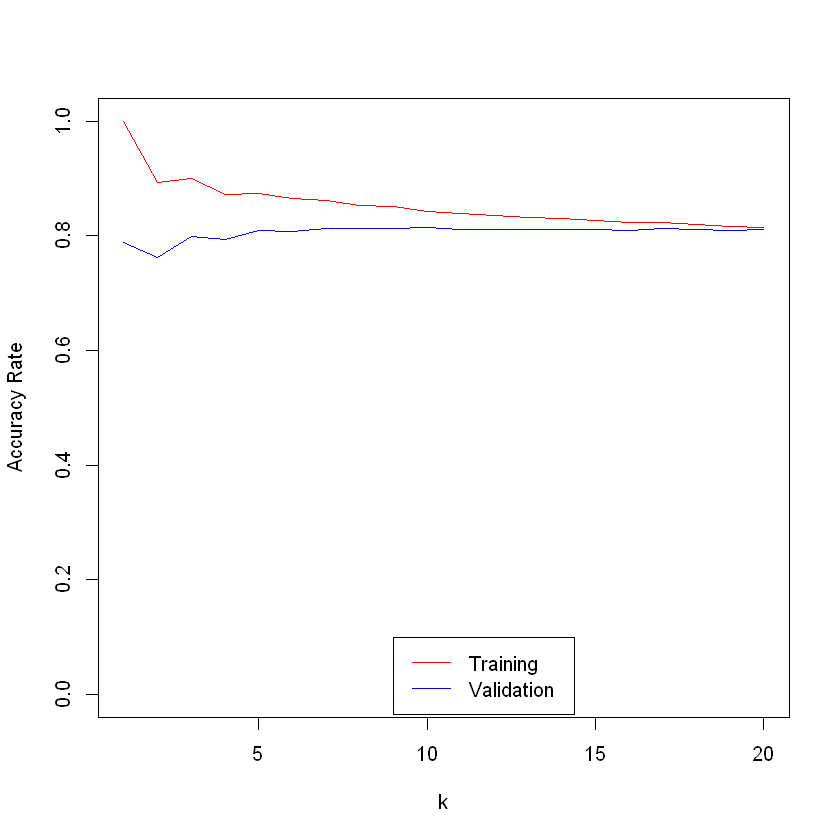

In [154]:
plot(c(1,kmax),c(0,1),type="n", xlab="k",ylab="Accuracy Rate")
lines(AC1,col="red")
lines(AC2,col="blue")
legend(9, 0.1, c("Training","Validation"),lty=c(1,1), col=c("red","blue"))

AC1
AC2